# A1 PROPOSAL OF QUESTION

By reviewing characterisitics of customers that have churned can we find customers that have not churned who may have the same characteristics and therefore be at potential risk of churning?

K-means clustering is an algorithm that will support the method of creating clusters and then classifying new data against those clusters. 





# A2 DEFINED GOAL
In order to decrease churn as a company we must first understand why customers churn and then create mechanisms or incentives to remove that risk. By identifying those currently at risk by classifying them with those that have churned we can have a subset of at risk customers to garner insights on why they may churn and improve our customers exeperience to reduce churn. 


# B1:Explanation of Clustering Technique
'''

Data points will be inputed into K-means and grouped into clusters. This will be the training data. 
This will create a model of data that a new data will belong to. 

This is similiar as a recommendation engine of people who bought these items are likely to by these other items.
By reviewing Churned customers metrics we can create groups and then classify non churned customers to see which ones are likely to mimic or come close to patterns of Churned customers. 


This will be done by using distance between points as a measure of similarity. This is going to be based on k-means). K equaling the number of clusters and means meaning averages.

# B2:Summary of Technique Assumption

Kmeans assumes that all features have an equal variance within a cluster. This means there is no account for different sizes or densisties for clusters.




# B3:Packages or Libraries List
##### system
Used to navigate find files change directories

- import sys, os 

##### Data prep and manipulation
Used to merge filter manipulate and prep data

- import pandas as pd
- import numpy as np

###### stats
Used to understand data with statistical aggregates and analysis

- import scipy.stats as stats
- import statsmodels.api as sm

##### Visualization
Used to visually represent data

- import seaborn as sns
- import matplotlib as mpl
- import matplotlib.pyplot as plt
- from matplotlib import rcParams
- plt.rcParams.update({'figure.max_open_warning': 0})

#### Preprocessing Feature Selection
Used to scale, normalize and feature select for modeling

- from sklearn.preprocessing import MinMaxScaler
- from sklearn.preprocessing import StandardScaler
- from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
- from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split, StratifiedShuffleSplit

#### Model Selection
Used to insatiate the model and make predictions
- from sklearn.cluster import KMeans


#### Model Evaluation
Used to evaluate the fit, accuracy, and effectiveness of the model

- from sklearn.metrics import roc_curve, auc
- from sklearn.metrics import accuracy_score, precision_score, f1_score
- from sklearn.metrics import mean_squared_error as MSE


In [1]:
#### LOAD LIBRARIES
##### system
import sys, os
from time import time

##### Data
import pandas as pd
import numpy as np


###### stats
import scipy.stats as stats
import math
import statsmodels.api as sm

##### Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

#### PreProcessing Test train split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion


#### Models
from sklearn.cluster import KMeans


#### Evaluation of Models
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error as MSE

# C1:Data Preprocessing
One goal for preprocessing will be to normalize data or place on same scale using scalar functions or techniques. This will assist in ensuring elements are indexed and extreme variances do not create vast contrasts between features. Example of this would be purching power of 1 hour of work at minimum wage for gas vs electricity. It would appear in a ratio that you have a much stronger purchasing power over time with electricity than gas but only because of the cost per unit is in the fraction of pennies. Whereas placing both on an indexed scale of 0 to 1 where 1 = the max value for electricity over time and same for gas then each time point of purchase is divided by that highest value you now have both features on the same scale to see how the purchasing power is over time equally. 



# C2 Dataset Variables
Kmeans looks at distance and for this reason we will be using continuous data as the variables and using only churn categorical as a classification label. 
These will be the variables used to perform analysis.
-    Population Continuous
-    Children Continuous
-    Age Continuous
-    Income Continuous
-    Outage_sec_perweek Continuous
-    Email Continuous
-    Contacts Continuous
-    Yearly_equip_failure Continuous
-    Tenure Continuous
-    MonthlyCharge Continuous
-    Bandwidth_GB_Year Continuous




# C3:Steps for Analysis
### Steps used to prepare data.

    a) Load data and remove unneeded fields
    b) remove blank spaces
    c) remove duplicates
    d) ensure floats are in integer format
    e) rename Item fields with metadata
    f) remove Nulls
    g) split data into Numeric and Object
    h) create subset for features of interest
    i) re-encode Churn & Yes and No to Binary 0 & 1
    j) load features into X variable and target into y
    k) use a scaling method to standardize continuous values
    l) Perfrom EDA(exploratory data analysis)




# a) Load data and remove unneeded fields
# LOAD DATA

In [2]:
file = pd.read_csv('C://Users//msmorris//Desktop//CHURN_VIZ//churn_clean.csv')
file.head()

,CaseOrder,Customer_id,Interaction,UID,input_date,City,State,County,Zip,Lat,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,6/29/2021,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,2/10/2020,West Branch,MI,Ogemaw,48661,44.32893,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,9/6/2021,Yamhill,OR,Yamhill,97148,45.35589,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,5/30/2021,Del Mar,CA,San Diego,92014,32.96687,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,7/5/2021,Needville,TX,Fort Bend,77461,29.38012,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
# Drop unneeded fields
file = file.drop(['UID','TimeZone','input_date','State','Job','CaseOrder', 'Customer_id', 
                  'Interaction', 'Lat', 'Lng','County', 'Zip', 'Area', 'City', 'Population'], axis = 1)

# b) remove blank spaces

In [4]:
## Assumption is the data is already cleaned per course 207. Validating there are no blank records
for col in file:
    blanks = []
    if file.columns.isna().any()== True:
        blanks = col
print(blanks)

[]


In [5]:
# For effiecency will still make assumption that data is cleaned but perform removal of blank spaces and drop duplicates
# Remove blank spaces
file = file.replace(" ", "")

# c) remove duplicates

In [6]:
# Drop Duplicates
file = file.drop_duplicates()

# d) ensure floats are in integer format

In [7]:
#Convert INF to INT
# Convert duration to integer
for col in file:
    if file[col].dtype == 'float':
        file[col] = file[col].astype(int)

# e) rename Item fields with metadata

In [8]:
# rename item fields
col = file.columns.values
item_desc= (['Timely_response', 'Timely_fixes', 'Timely_replacements', 
            'Reliability', 'Options','Respectful_response', 
            'Courteous_exchange', 'Evidence_of_active_listening'])
col[-8:]= item_desc
file.columns = col

# f) remove Nulls

In [9]:
file_null = file.isnull().any()
print(file_null)

Children                        False
Age                             False
Income                          False
Marital                         False
Gender                          False
Churn                           False
Outage_sec_perweek              False
Email                           False
Contacts                        False
Yearly_equip_failure            False
Techie                          False
Contract                        False
Port_modem                      False
Tablet                          False
InternetService                 False
Phone                           False
Multiple                        False
OnlineSecurity                  False
OnlineBackup                    False
DeviceProtection                False
TechSupport                     False
StreamingTV                     False
StreamingMovies                 False
PaperlessBilling                False
PaymentMethod                   False
Tenure                          False
MonthlyCharg

# g) split data into Numeric and Object

In [10]:
# Categorical values group creation
obj = []
num = []
for col in file:
    if file[col].dtype == 'object':
        obj.append(col) 
    else:
        num.append(col)
print("Object list \n",obj)
print('\n')
print("Numeric list \n",num)

Object list 
 ['Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


Numeric list 
 ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes', 'Timely_replacements', 'Reliability', 'Options', 'Respectful_response', 'Courteous_exchange', 'Evidence_of_active_listening']


# h) create subset for features of interest

In [11]:
df = file[['Churn', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

# i) re-encode Churn & Yes and No to Binary 0 & 1

In [12]:
import warnings
warnings.simplefilter(action="ignore")
df['churn_dum'] = [1 if i == 'Yes' else 0 for i in df['Churn']]
df = df.drop('Churn', axis = 1)
df

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,churn_dum
0,0,68,28561,7,10,0,1,6,172,904,0
1,1,27,21704,11,12,0,1,1,242,800,1
2,4,50,9609,10,9,0,1,15,159,2054,0
3,1,48,18925,14,15,2,0,17,119,2164,0
4,0,83,40074,8,16,2,1,1,149,271,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723,9,12,2,0,68,159,6511,0
9996,4,48,34129,6,15,2,0,61,207,5695,0
9997,1,48,45983,6,10,0,0,47,169,4159,0
9998,1,39,16667,12,14,1,0,71,252,6468,0


# j) load features into X variable and target into y

In [13]:
# Defining X and y
# Set X as data and y as Target
X = df.drop('churn_dum',axis=1)
y = df['churn_dum']

# k) use a scaling method to standardize continuous values

In [14]:
#Standardize Num fields

# standardize using std scale
X = (X - X.mean())/X.std()

# l) Perfrom EDA(exploratory data analysis)

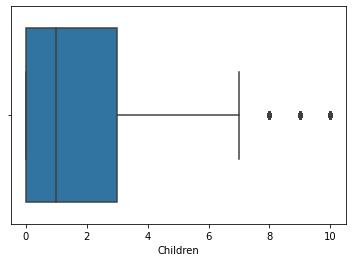

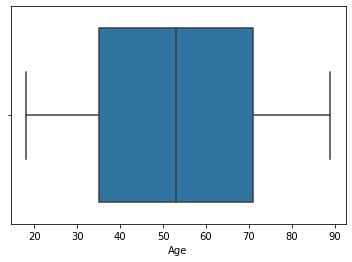

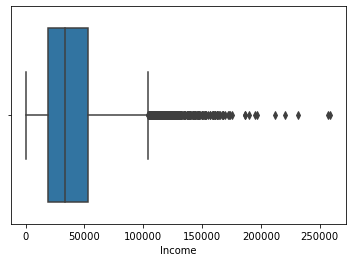

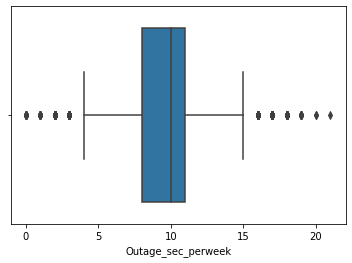

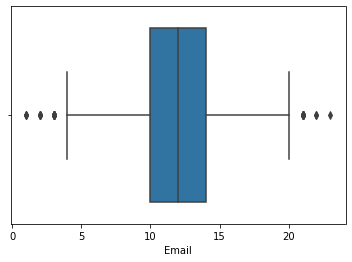

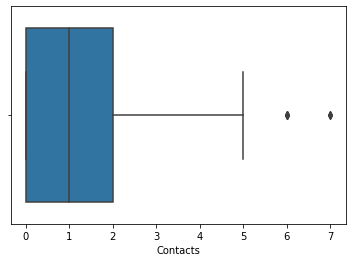

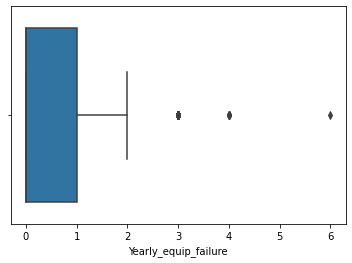

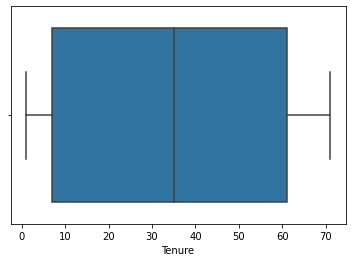

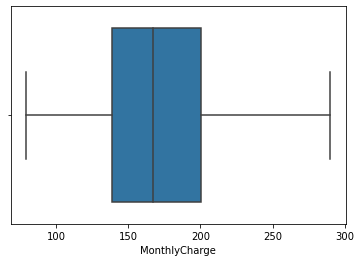

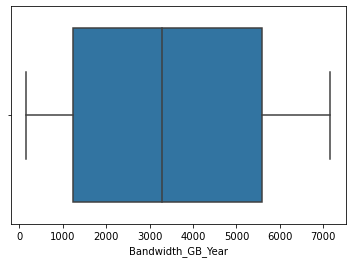

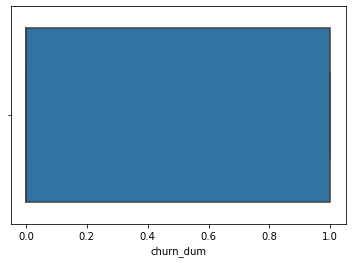

In [15]:
for column in df:
    plt.figure()    
    sns.boxplot(data = df, x = column)
    plt.show()
    ;

<Figure size 432x288 with 0 Axes>

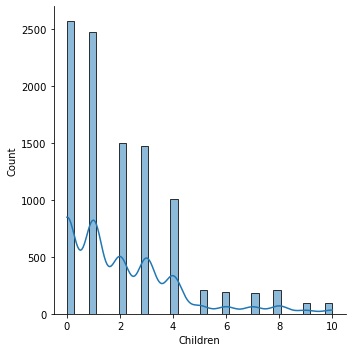

<Figure size 432x288 with 0 Axes>

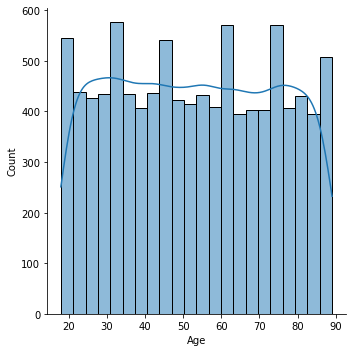

<Figure size 432x288 with 0 Axes>

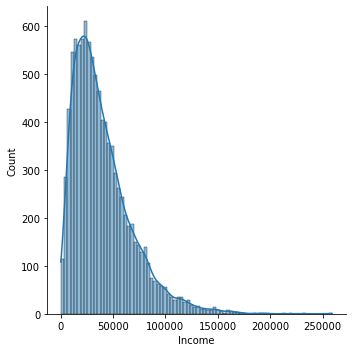

<Figure size 432x288 with 0 Axes>

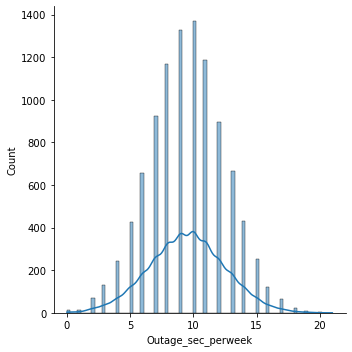

<Figure size 432x288 with 0 Axes>

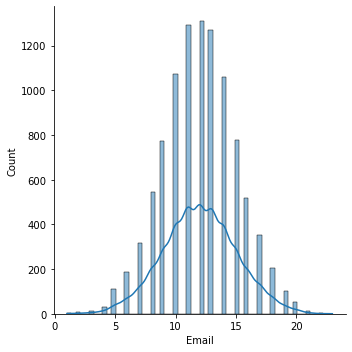

<Figure size 432x288 with 0 Axes>

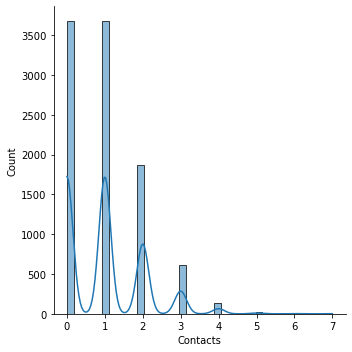

<Figure size 432x288 with 0 Axes>

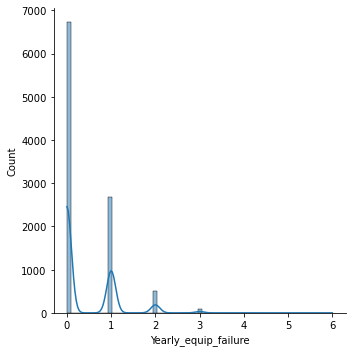

<Figure size 432x288 with 0 Axes>

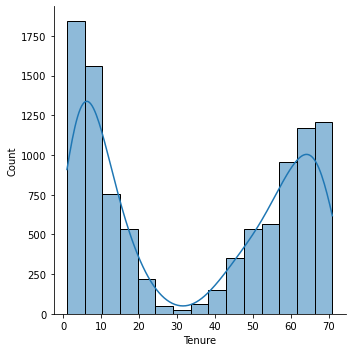

<Figure size 432x288 with 0 Axes>

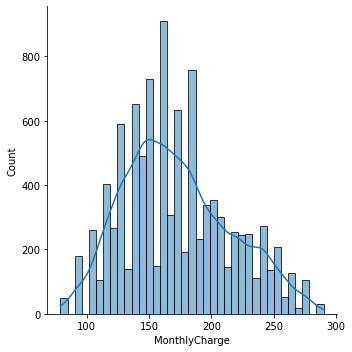

<Figure size 432x288 with 0 Axes>

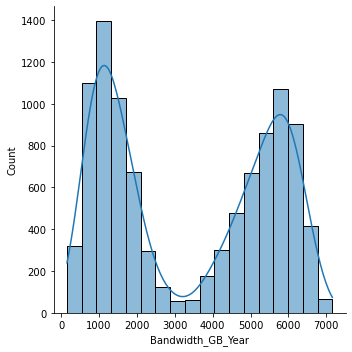

<Figure size 432x288 with 0 Axes>

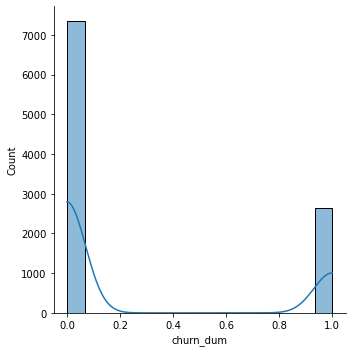

In [16]:
for column in df:
    plt.figure()    
    sns.displot(data = df, x =column, kde = True);

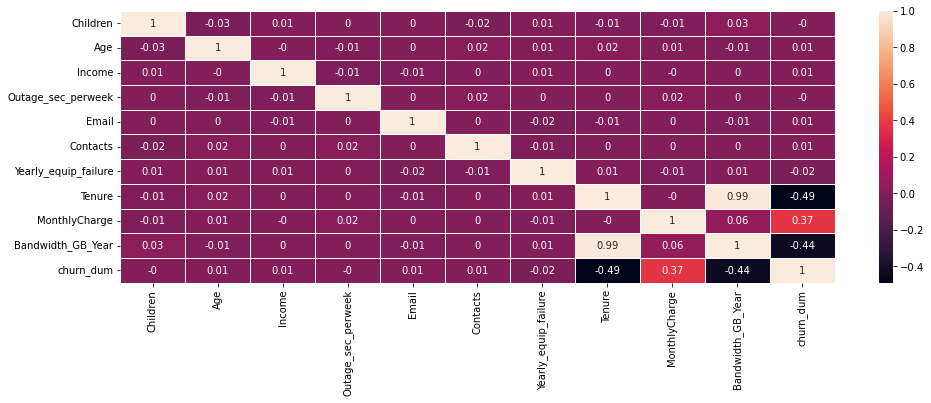

In [17]:
corrMatrix = df.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, linewidths=.5, annot=True)
plt.show()

# C4:Cleaned Dataset


In [18]:
df.to_csv("C:\\Users\\msmorris\\Desktop\\d212t1_pred.csv")

# D1:Output and Intermediate Calculations
'''
The submission accurately describes the analysis technique used to 
appropriately analyze the data, and the submission includes accurate 
screenshots of the intermediate calculations performed.
'''

While Kmeans is the technique being used to analyze churn, Elbow method will be used to analyze results to find the best fit or best K number for the fit. Interpreting the elbow graph will be done by by observing a point where inertia is low with the least number of K. This is indicated in the graph where the line plot starts to flatten.


# D2:Code Execution
'''
The submission provides the code used to perform the clustering analysis 
technique from part D1 and the code executes without errors.
'''

In [19]:
df= pd.read_csv("C:\\Users\\msmorris\\Desktop\\d212t1_pred.csv")
df

,Unnamed: 0,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,churn_dum
0,0,0,68,28561,7,10,0,1,6,172,904,0
1,1,1,27,21704,11,12,0,1,1,242,800,1
2,2,4,50,9609,10,9,0,1,15,159,2054,0
3,3,1,48,18925,14,15,2,0,17,119,2164,0
4,4,0,83,40074,8,16,2,1,1,149,271,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,3,23,55723,9,12,2,0,68,159,6511,0
9996,9996,4,48,34129,6,15,2,0,61,207,5695,0
9997,9997,1,48,45983,6,10,0,0,47,169,4159,0
9998,9998,1,39,16667,12,14,1,0,71,252,6468,0


Simple elbow view

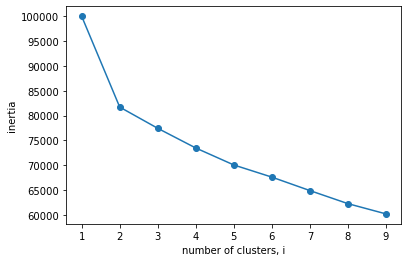

In [20]:
km = range(1,10)
inertias = []
for i in km:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(km, inertias, '-o')
plt.xlabel('number of clusters, i')
plt.ylabel('inertia')
plt.xticks(km)
plt.show()

In [21]:
# review number of clusters and intertia rating
clusters = range(1,8) 
inertia = []
for i in clusters:
    kmeans = KMeans(n_clusters=i, random_state=2)
    kmeans = kmeans.fit(X)
    u = kmeans.inertia_
    inertia.append(u)
    print(i, "Clusters inertia rating is:", u)



1 Clusters inertia rating is: 99990.00000000358
2 Clusters inertia rating is: 81696.07241376914
3 Clusters inertia rating is: 77418.76782921923
4 Clusters inertia rating is: 73919.0062552024
5 Clusters inertia rating is: 70896.91173246784
6 Clusters inertia rating is: 67195.25916768139
7 Clusters inertia rating is: 64448.69400043154


Monthly Charge Outage_sec_perweek

      MonthlyCharge  Outage_sec_perweek  cluster
0               172                   7        0
1               242                  11        1
2               159                  10        0
3               119                  14        0
4               149                   8        0
...             ...                 ...      ...
9995            159                   9        0
9996            207                   6        1
9997            169                   6        0
9998            252                  12        1
9999            217                  11        1

[10000 rows x 3 columns]


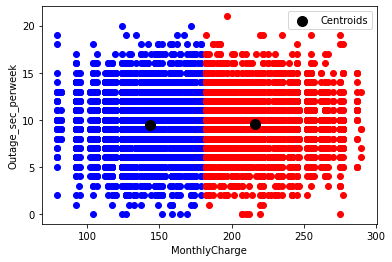

In [22]:
model = KMeans(n_clusters=2, random_state = 42).fit(df[['MonthlyCharge','Outage_sec_perweek']])
labels = model.predict(df[['MonthlyCharge','Outage_sec_perweek']])
df['cluster'] = labels
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1.MonthlyCharge, df1['Outage_sec_perweek'],color='blue')
plt.scatter(df2.MonthlyCharge, df2['Outage_sec_perweek'],color='red')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('MonthlyCharge')
plt.ylabel('Outage_sec_perweek')
plt.legend()

print(df[['MonthlyCharge','Outage_sec_perweek','cluster']])

MonthlyCharge Income

      MonthlyCharge  Income  cluster
0               172   28561        0
1               242   21704        0
2               159    9609        0
3               119   18925        0
4               149   40074        0
...             ...     ...      ...
9995            159   55723        1
9996            207   34129        0
9997            169   45983        0
9998            252   16667        0
9999            217    9020        0

[10000 rows x 3 columns]


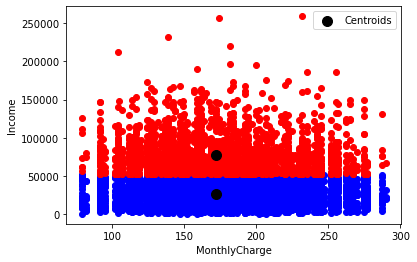

In [23]:
model = KMeans(n_clusters=2, random_state = 42).fit(df[['MonthlyCharge','Income']])
labels = model.predict(df[['MonthlyCharge','Income']])
df['cluster'] = labels
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1.MonthlyCharge, df1['Income'],color='blue')
plt.scatter(df2.MonthlyCharge, df2['Income'],color='red')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('MonthlyCharge')
plt.ylabel('Income')
plt.legend()

print(df[['MonthlyCharge','Income','cluster']])

MonthlyCharge Tenure

      MonthlyCharge  Tenure  cluster
0               172       6        0
1               242       1        1
2               159      15        0
3               119      17        0
4               149       1        0
...             ...     ...      ...
9995            159      68        0
9996            207      61        1
9997            169      47        0
9998            252      71        1
9999            217      63        1

[10000 rows x 3 columns]


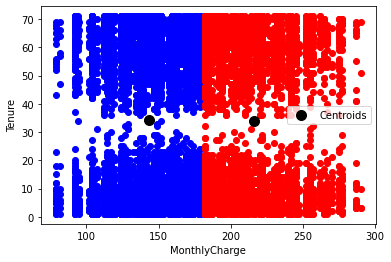

In [25]:
model = KMeans(n_clusters=2, random_state = 42).fit(df[['MonthlyCharge','Tenure']])
labels = model.predict(df[['MonthlyCharge','Tenure']])
df['cluster'] = labels
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1.MonthlyCharge, df1['Tenure'],color='blue')
plt.scatter(df2.MonthlyCharge, df2['Tenure'],color='red')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('MonthlyCharge')
plt.ylabel('Tenure')
plt.legend()

print(df[['MonthlyCharge','Tenure','cluster']])

MonthlyCharge Bandwidth_GB_Year

      MonthlyCharge  Bandwidth_GB_Year  cluster
0               172                904        1
1               242                800        1
2               159               2054        1
3               119               2164        1
4               149                271        1
...             ...                ...      ...
9995            159               6511        0
9996            207               5695        0
9997            169               4159        0
9998            252               6468        0
9999            217               5857        0

[10000 rows x 3 columns]


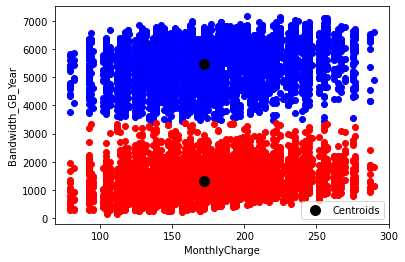

In [27]:
model = KMeans(n_clusters=2, random_state = 42).fit(df[['MonthlyCharge','Bandwidth_GB_Year']])
labels = model.predict(df[['MonthlyCharge','Bandwidth_GB_Year']])
df['cluster'] = labels
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1.MonthlyCharge, df1['Bandwidth_GB_Year'],color='blue')
plt.scatter(df2.MonthlyCharge, df2['Bandwidth_GB_Year'],color='red')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('MonthlyCharge')
plt.ylabel('Bandwidth_GB_Year')
plt.legend()

print(df[['MonthlyCharge','Bandwidth_GB_Year','cluster']])

      Tenure  Bandwidth_GB_Year  cluster
0          6                904        1
1          1                800        1
2         15               2054        1
3         17               2164        1
4          1                271        1
...      ...                ...      ...
9995      68               6511        0
9996      61               5695        0
9997      47               4159        0
9998      71               6468        0
9999      63               5857        0

[10000 rows x 3 columns]


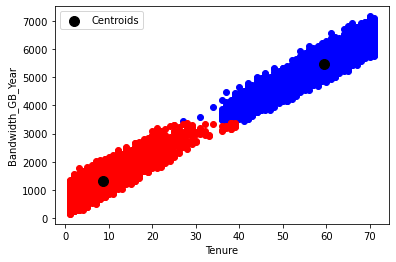

In [29]:
model = KMeans(n_clusters=2, random_state = 42).fit(df[['Tenure','Bandwidth_GB_Year']])
labels = model.predict(df[['Tenure','Bandwidth_GB_Year']])
df['cluster'] = labels
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1.Tenure, df1['Bandwidth_GB_Year'],color='blue')
plt.scatter(df2.Tenure, df2['Bandwidth_GB_Year'],color='red')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Tenure')
plt.ylabel('Bandwidth_GB_Year')
plt.legend()

print(df[['Tenure','Bandwidth_GB_Year','cluster']])

# E1:Accuracy of Clustering Technique

In [30]:
from sklearn import metrics
actual = df['churn_dum'].replace({'Yes':0, 'No':1})
pred = df['cluster']
metrics.accuracy_score(actual, pred)

0.7063

In [32]:
correct_labels = sum(y == labels)
print("{} out of {} correct." .format(correct_labels, y.size))
print('Accuracy: {0:0.2f}'. format(correct_labels/float(y.size)))

7063 out of 10000 correct.
Accuracy: 0.71


# E2:Results and Implications

The results of this analysis show a 70% accuracy. this implies that the model is correct 70% of the time when categorizing a customer in yes or no for churn. Because of the significance of the accuracy it is worth while to review the data closer to for opportunities. 

Applying the elbow method or scree plot, observing k=2 (k is number of clusters) is the ideal number of clusters for this data. However the inertia is high with a score of 81696.07. this implys more work to be done to reduce dimenensionality and tune parameters. 

# E3:Limitation


A major limitation of Kmeans is the inability to use categorical data. 

# E4:Course of Action


Due to the higher accuracy of this model, showing customers that churn and those that do not it is worthwhile to perform more analysis around relevent components (PCA) and tuning of paremeters to reduce inertia and vette out non-predictive features to isolate those that are predictive to give insight into our products and service for decreaseing Churn. 